# SEA-LAND SEG DATASET

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# img_all = np.load('/Users/simenallum/Downloads/Sea-land_segmentation_dataset/npyfiles/test/test1/test_image_arr.npy')
img_all = np.load('/home/simenallum/Desktop/Sea-land_segmentation_dataset_raw/npyfiles/train/train_image_arr.npy')
mask_all = np.load('/home/simenallum/Desktop/Sea-land_segmentation_dataset_raw/npyfiles/train/train_groundTruth_arr.npy')

print(img_all.shape)
print(mask_all.shape)


(1544, 256, 256, 4)
(1544, 256, 256, 1)


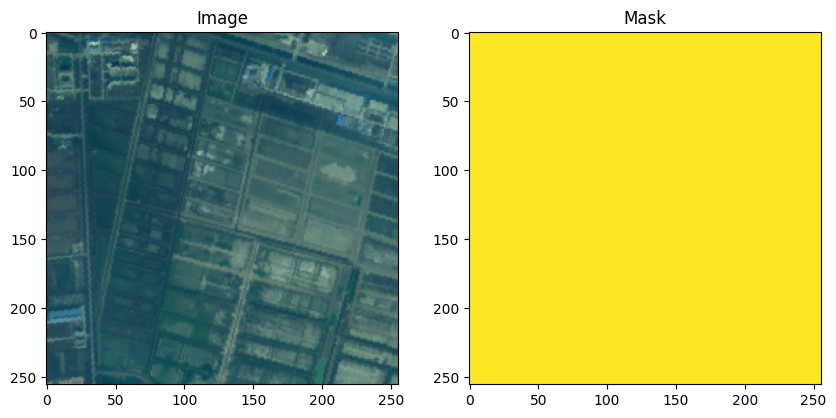

In [15]:
import random

# Set the upper limit of the random number range
upper_limit = img_all.shape[0]-1

# Generate a random number between 0 and upper_limit
img_num = random.randint(0, upper_limit)

red_band = img_all[img_num,:,:,2]
green_band = img_all[img_num,:,:,1]
blue_band = img_all[img_num,:,:,0]

# Stack the three bands into a single RGB image
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

rgb_image = rgb_image.astype('float32')

scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Display the original and brighter images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(scaled_image)
ax[0].set_title('Image')
ax[1].imshow(mask_all[img_num,:,:,:], vmin=0, vmax=1)
ax[1].set_title('Mask')
plt.show()

### Make RBG colored images

In [ ]:
img_all = np.load('/home/simenallum/Desktop/Sea-land_segmentation_dataset_raw/npyfiles/train/train_image_arr.npy')

In [21]:
import os
import numpy as np
from PIL import Image

folder = "/home/simenallum/Desktop/SWED_images/images"

num_images = img_all.shape[0]

# Create a directory to store the PNG images
if not os.path.exists(folder):
    os.makedirs(folder)

user_input = input("Make Images masks? y?")
if user_input == 'y':
    # Loop through each image in the array
    for i in range(num_images):
        # Get the image data
        image_data = img_all[i]

        # Extract the three color channels
        red_band = image_data[:, :, 2]
        green_band = image_data[:, :, 1]
        blue_band = image_data[:, :, 0]

        # Stack the three bands into a single RGB image
        rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

        # Normalize the image
        rgb_image = rgb_image.astype('float32')
        scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

        # Convert the array to an image and save it as a PNG file
        image = Image.fromarray((scaled_image * 255).astype('uint8'), mode='RGB')
        image.save(f'{folder}/{i}.png')

### Make binary segmentation masks

In [ ]:
import os
import numpy as np
from PIL import Image


mask_all = np.load('/home/simenallum/Desktop/Sea-land_segmentation_dataset_raw/npyfiles/train/train_groundTruth_arr.npy')

In [ ]:

num_images = mask_all.shape[0]

folder = "/home/simenallum/Desktop/SWED_images/labels"

# Create a directory to store the PNG images
if not os.path.exists(folder):
    os.makedirs(folder)

user_input = input("Make segmentation masks? y?")
if user_input == 'y':
    # Loop through each image in the array
    for i in range(num_images):
        # Get the image data
        image_data = mask_all[i]
        image_data = image_data.astype('bool')

        # Reverse all bits in the image data
        image_data_reversed = np.invert(image_data)

        # Convert the reversed data to a 2D array of 0s and 1s
        image_data_reversed_2d = np.squeeze(image_data_reversed, axis=-1)
        image_data_reversed_2d[image_data_reversed_2d > 0] = 1

        # Convert the array to an image and save it as a PNG file
        image = Image.fromarray(image_data.astype('uint8') * 255, mode='L')
        image.save(f'{folder}/{i}.png')


# SWED dataset

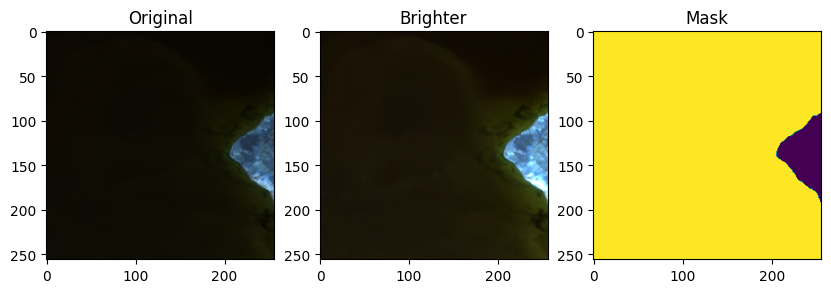

In [17]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageEnhance

# Load the image data into a NumPy array
img_array = np.load('/home/simenallum/Desktop/SWED/train/images/S2A_MSIL2A_20191128T144731_N0213_R139_T20PLS_20191128T171514_image_1_25.npy')
mask_array = np.load('/home/simenallum/Desktop/SWED/train/labels/S2A_MSIL2A_20191128T144731_N0213_R139_T20PLS_20191128T171514_chip_1_25.npy')
mask_array = mask_array.transpose((1, 2, 0))

# Extract the red, green, and blue bands from the image array
red_band = img_array[:,:,1]
green_band = img_array[:,:,2]
blue_band = img_array[:,:,3]

# Stack the three bands into a single RGB image
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Convert the data type of the RGB image array to uint8
rgb_image = rgb_image.astype('float32')
scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Assuming 'image' is the PIL Image object of the original image
image = np.squeeze(scaled_image)

# Next, convert the data type to uint8 and scale the values to the range 0-255
image = (image * 255).astype(np.uint8)

# Finally, create the PIL Image object from the NumPy array
pil_image = Image.fromarray(image)

enhancer = ImageEnhance.Brightness(pil_image)
brighter_image = enhancer.enhance(1.8)

# Display the original and brighter images side by side
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(brighter_image)
ax[1].set_title('Brighter')
ax[2].imshow(mask_array)
ax[2].set_title('Mask')

plt.show()

# MAKE IMAGES AND MASKS FOR SWED DATASET

- This dataset contains ALOT of bad looking non-relevant sea images. -> Remove all images with with "more" sea than 80%, and "less" sea than 20%

In [30]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

def save_binary_masks_and_images(mask_folder, image_folder, image_save_folder, mask_save_folder):
    for filename in tqdm(os.listdir(mask_folder)):
        if "_chip_" in filename and filename.endswith(".npy"):
            mask_file_path = os.path.join(mask_folder, filename)
            image_file_path = os.path.join(
                image_folder, 
                filename.replace("_chip_", "_image_")
            )
            
            mask = np.load(mask_file_path)
            num_ones = np.count_nonzero(mask == 1)
            total_elements = np.prod(mask.shape)
            percent_ones = num_ones / total_elements
            
            if percent_ones >= 0.2 and percent_ones <= 0.8:
                # Save mask as binary PNG
                mask_png_path = os.path.join(mask_save_folder, filename.replace(".npy", ".png"))
                mask_npy = mask.transpose((1, 2, 0))
                mask_npy = np.squeeze(mask_npy)
                mask_img = Image.fromarray(mask_npy.astype('uint8') * 255, mode='L')
                mask_img.save(mask_png_path)
                
                # Save image as PNG
                image_png_path = os.path.join(image_save_folder, filename.replace(".npy", ".png"))
                image = np.load(image_file_path)

                # Extract the red, green, and blue bands from the image array
                red_band = image[:,:,1]
                green_band = image[:,:,2]
                blue_band = image[:,:,3]

                # Stack the three bands into a single RGB image
                rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

                # Convert the data type of the RGB image array to uint8
                rgb_image = rgb_image.astype('float32')
                scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

                # Assuming 'image' is the PIL Image object of the original image
                image = np.squeeze(scaled_image)

                # Next, convert the data type to uint8 and scale the values to the range 0-255
                image = (image * 255).astype(np.uint8)

                # Finally, create the PIL Image object from the NumPy array
                pil_image = Image.fromarray(image)

                enhancer = ImageEnhance.Brightness(pil_image)
                brighter_image = enhancer.enhance(1)

                brighter_image.save(image_png_path)


In [31]:
mask_folder = "/home/simenallum/Desktop/SWED/train/labels"
mask_save_folder = "/home/simenallum/Desktop/SWED_images/labels"
image_folder = "/home/simenallum/Desktop/SWED/train/images"
image_save_folder = "/home/simenallum/Desktop/SWED_images/images"

save_binary_masks_and_images(mask_folder=mask_folder, image_folder=image_folder, image_save_folder=image_save_folder, mask_save_folder=mask_save_folder)

100%|██████████| 28240/28240 [11:22<00:00, 41.40it/s]  


### Remove all broken images

- Some of the images in the SWED dataset was not complete images. Fix it by removing all images with 1s after the construction.

In [141]:
folder_path = "/home/simenallum/Desktop/SWED_images/labels/"

import os
from PIL import Image

def print_filenames_with_ones(folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            if 1 in set(img.getdata()):
                print(filename)
                count += 1

    print(count)

print_filenames_with_ones(folder_path)

0


In [43]:
folder_path = "/home/simenallum/Desktop/SWED_images/labels/"
image_folder_path = "/home/simenallum/Desktop/SWED_images/images/"

import os
from PIL import Image

def remove_broken_files(folder_path, image_folder):
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            if 1 in set(img.getdata()):
                os.remove(img_path)
                os.remove(os.path.join(image_folder, filename))

remove_broken_files(folder_path, image_folder_path)

# Construct test set

- Based on both datasets

In [59]:
save_test_images_folder = "/home/simenallum/Desktop/SWED_images/test/images"
save_test_labels_folder = "/home/simenallum/Desktop/SWED_images/test/labels"

#### Make images from TIF files for the SWED dataset

In [61]:
from PIL import Image
import numpy as np
import os
import tifffile

import os
from PIL import Image
import tifffile

# Set input and output folders
SWED_test_images_folder = "/home/simenallum/Desktop/SWED/test/images/"

# Iterate through all files in the input folder
for filename in tqdm(os.listdir(SWED_test_images_folder)):
    # Load TIF image
    img_path = os.path.join(SWED_test_images_folder, filename)
    img = tifffile.imread(img_path)

    # Convert to NumPy array
    img_array = np.array(img).transpose(1,2,0)

    # Extract the red, green, and blue bands from the image array
    red_band = img_array[:,:,1]
    green_band = img_array[:,:,2]
    blue_band = img_array[:,:,3]

    # Stack the three bands into a single RGB image
    rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

    # Convert the data type of the RGB image array to uint8
    rgb_image = rgb_image.astype('float32')
    scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

    # Assuming 'image' is the PIL Image object of the original image
    image = np.squeeze(scaled_image)

    # Next, convert the data type to uint8 and scale the values to the range 0-255
    image = (image * 255).astype(np.uint8)

    # Finally, create the PIL Image object from the NumPy array
    pil_image = Image.fromarray(image)

     # Save the PIL image as a PNG file
    output_filename = os.path.splitext(filename)[0] + ".png"
    output_path = os.path.join(save_test_images_folder, output_filename)
    pil_image.save(output_path)


100%|██████████| 98/98 [00:04<00:00, 20.60it/s]


#### Make labels from TIF image for the SWED dataset

In [65]:
from PIL import Image
import numpy as np
import os
import tifffile

import os
from PIL import Image
import tifffile

# Set input and output folders
SWED_test_labels_folder = "/home/simenallum/Desktop/SWED/test/labels/"

# Iterate through all files in the input folder
for filename in tqdm(os.listdir(SWED_test_labels_folder)):
    # Load TIF image
    img_path = os.path.join(SWED_test_labels_folder, filename)
    img = tifffile.imread(img_path)

    # Convert to NumPy array
    img_array = np.array(img)

    # Convert the array to an image and save it as a PNG file
    image = Image.fromarray(img_array.astype('uint8') * 255, mode='L')

    # Save the PIL image as a PNG file
    filename = filename.replace("_label_", "_image_")
    output_filename = os.path.splitext(filename)[0] + ".png"
    output_path = os.path.join(save_test_labels_folder, output_filename)
    image.save(output_path)


100%|██████████| 98/98 [00:00<00:00, 245.64it/s]


#### Make images for the sea-land seg dataset
- First construct for the un-unused val dataset

In [137]:
img_all = np.load(f'/home/simenallum/Desktop/Sea-land_segmentation_dataset_raw/npyfiles/valid/valid_image_arr.npy')

In [138]:
import os
import numpy as np
from PIL import Image

folder = "/home/simenallum/Desktop/SWED_images/test_sea-land/images"

num_images = img_all.shape[0]

# Create a directory to store the PNG images
if not os.path.exists(folder):
    os.makedirs(folder)

user_input = input("Make Images masks? y?")
if user_input == 'y':
    # Loop through each image in the array
    for i in tqdm(range(num_images)):
        # Get the image data
        image_data = img_all[i]

        # Extract the three color channels
        red_band = image_data[:, :, 2]
        green_band = image_data[:, :, 1]
        blue_band = image_data[:, :, 0]

        # Stack the three bands into a single RGB image
        rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

        # Normalize the image
        rgb_image = rgb_image.astype('float32')
        scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

        # Convert the array to an image and save it as a PNG file
        image = Image.fromarray((scaled_image * 255).astype('uint8'), mode='RGB')
        image.save(f'{folder}/val_{i}.png')

100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


#### Make labels for the sea-land-seg dataset

- First construct for the un-used val dataset

In [139]:
import os
import numpy as np
from PIL import Image


mask_all = np.load(f'/home/simenallum/Desktop/Sea-land_segmentation_dataset_raw/npyfiles/valid/valid_groundTruth_arr.npy')

In [140]:

num_images = mask_all.shape[0]

folder = "/home/simenallum/Desktop/SWED_images/test_sea-land/labels"

# Create a directory to store the PNG images
if not os.path.exists(folder):
    os.makedirs(folder)

user_input = input("Make Images masks? y?")
if user_input == 'y':
    # Loop through each image in the array
    for i in tqdm(range(num_images)):
        # Get the image data
        image_data = mask_all[i]
        image_data = image_data.astype('bool')

        # Reverse all bits in the image data
        image_data_reversed = np.invert(image_data)

        # Convert the reversed data to a 2D array of 0s and 1s
        image_data_reversed_2d = np.squeeze(image_data_reversed, axis=-1)
        image_data_reversed_2d[image_data_reversed_2d > 0] = 1

        # Convert the array to an image and save it as a PNG file
        image = Image.fromarray(image_data_reversed_2d.astype('uint8') * 255, mode='L')
        image.save(f'{folder}/val_{i}.png')


100%|██████████| 1/1 [00:00<00:00, 41.92it/s]


- Construct for the test set in cheeky and ugly for-loop

In [ ]:
for num in tqdm(range(1,13)):
    img_all = np.load(f'/home/simenallum/Desktop/Sea-land_segmentation_dataset_raw/npyfiles/test/test{num}/test_image_arr.npy')

    import os
    import numpy as np
    from PIL import Image

    folder = "/home/simenallum/Desktop/SWED_images/test_sea-land/images"

    num_images = img_all.shape[0]

    # Create a directory to store the PNG images
    if not os.path.exists(folder):
        os.makedirs(folder)

    if True:
        # Loop through each image in the array
        for i in tqdm(range(num_images)):
            # Get the image data
            image_data = img_all[i]

            # Extract the three color channels
            red_band = image_data[:, :, 2]
            green_band = image_data[:, :, 1]
            blue_band = image_data[:, :, 0]

            # Stack the three bands into a single RGB image
            rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

            # Normalize the image
            rgb_image = rgb_image.astype('float32')
            scaled_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

            # Convert the array to an image and save it as a PNG file
            image = Image.fromarray((scaled_image * 255).astype('uint8'), mode='RGB')
            image.save(f'{folder}/test{num}_{i}.png')


    mask_all = np.load(f'/home/simenallum/Desktop/Sea-land_segmentation_dataset_raw/npyfiles/test/test{num}/test_mask_arr.npy')


    num_images = mask_all.shape[0]

    folder = "/home/simenallum/Desktop/SWED_images/test_sea-land/labels"

    # Create a directory to store the PNG images
    if not os.path.exists(folder):
        os.makedirs(folder)

    if True:
        # Loop through each image in the array
        for i in tqdm(range(num_images)):
            # Get the image data
            image_data = mask_all[i]
            image_data = image_data.astype('bool')

            # Reverse all bits in the image data
            image_data_reversed = np.invert(image_data)

            # Convert the reversed data to a 2D array of 0s and 1s
            image_data_reversed_2d = np.squeeze(image_data_reversed, axis=-1)
            image_data_reversed_2d[image_data_reversed_2d > 0] = 1

            # Convert the array to an image and save it as a PNG file
            image = Image.fromarray(image_data_reversed_2d.astype('uint8') * 255, mode='L')
            image.save(f'{folder}/test{num}_{i}.png')
